# Borrador Proyecto IMT-2200 Grupo 28


Este jupyter notebook tiene como proposito hacer el analisis de admision a la educacion superior dentro de los años 20xx'2024.
Esta echo de manera explicativa con graficos y interpretaciones para cada caso, se recomienda ir directo a la seccion de Interpretacion para saltarse la parte tecnica.


## Índice

- **Import de librería**
    - Explicacinn de libreria a utilizar.
  

- **Lectura de archivos**
    - Leer el archivo de datos
    - Vista previa de los datos

- **Limpieza de datos**
    - Eliminar null y datos inconsistentes
    - Corregir errores
    - Tratar con duplicados
    - Renombrar columnas

- **Análisis de los Datos(EDA)**
    - Juntar bases
    - Hacer gráficos
    - ...
- **PREGUNTAS DE INVESTIGACIÓN**

  1. ¿Cuántas personas se inscribieron en cada periodo de admisión entre 2004 y 2025?


  2. ¿Hubo un aumento en las inscripciones en los periodos de transición (PSU/PTU/PAES)?


  3. Según el grupo socioeconómico, ¿cuál fue el porcentaje de ingresos en las distintas universidades?


  4. ¿Qué comunas presentaron los mayores porcentajes de ingresos a la educación superior?


  5. ¿Qué relación existe entre la situación de egreso de los estudiantes y los resultados de admisión a la educación superior?
 


*Nuevas pregunta surgida en el proceso EDA:*

    - ¿En los últimos años, los individuos que repiten la PAES logran mejorar sus puntajes?
     

    

- **Conclusiones**
    - Resumen Tecnico
    - ...

## Import de librerias a utilizar


- **Pandas**: Creación del DataFrame, su limpieza, joins, groupby, etc.
- **Numpy**: Pasar algunos datos a arreglos, vectores y matrices.
- **Matplotlib**: Gráficos.
- **Plotly**: Gráficos interactivos para la exploración y visualización.
- **...**


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from pathlib import Path
from copy import deepcopy as dcopy
#import geopandas as gpd


### Recoleccion de datos
 Se descargaron los Datos de forma manual a partir del siguiente link [https://portal-transparencia.demre.cl/portal-base-datos], descargados desde la Pagina oficial del demre, a traves de esto se hizo esta carpeta[[https://uccl0-my.sharepoint.com/:f:/g/personal/sebastin_mena_estudiante_uc_cl/EhgUUbAemNVLubCEjJvLvMkBOtbi40OF61aDvJpW7fV5DA?e=ymSFkT]] para una descarga facil de los datos, respecto a la ruta para la visualizacion de los datos se encuentran en el github, sin embargo la ruta a presentar es la siguiete :
```
2025-2/
|_ datos/
|__|_datos_limpios
|_ raw_data/
|__|_datos_brutos [en esta ruta se incertan los datos]
|_ .gitignore
|_ Borrador_Proyecto.ipynb
|_ GRUPO_28_PROYEECTO_IMT2200.PDf 
|_ README.md
```

## Contexto y motivacion

Nuestro Proyecto se enmarca en el análisis de los datos respecto a la educación superior de nuestro país, que ha transitado desde la PSU / PTU / PAES. Buscamos hacer un análisis para saber cómo afecta la desigualdad a nuestro país, pensando en cómo poder "reducir esta desigualdad" que afecta a nuestra nación y a nuestra educación, tal como se puede ver en el siguiente artículo: [https://www.elciudadano.com/educacion/paes-2022-pobreza-desigualdad-y-mala-calidad-educativa-caldo-de-cultivo-de-una-catastrofe-social/01/07/]

Como motivaciones Grupales, está el poder responder dudas respecto a la equidad real en el acceso a la universidad para la ciudadanía, por medio del proceso de admisión, buscando aportar una mirada a este tema.

Respecto a la PSU, PAES y PTU, estas fueron pruebas de admisión a la selección universitaria:

PSU (Prueba de Selección Universitaria): Fue una prueba estándar que estuvo vigente durante 17 años, entre 2003 y 2020.

PTU (Prueba de Transición Universitaria): Fue una prueba temporal que duró 2 años, entre 2020 y 2021, para la "transición" mientras se desarrollaba el sistema PAES.

PAES (Prueba de Acceso a la Educación Superior): Es la prueba que se utiliza actualmente desde el 2022. Esta prueba es el reemplazo de la PSU y busca crear un sistema más equitativo, enfocándose más en competencias en vez de conocimiento.

## Lectura de Archivos


    - Leer el archivo de datos
    - Vista previa de los datos

**-Leer el archivo de datos**

In [2]:
adm = []   # adm> lista con  df admision por years 

#archivos de admision estan en  ArchivoC_Adm20xx
print("Iniciando lectura ... \n \n")
for num in range(2004 ,2026):
    ruta = Path(f"raw_data/{num}")
    csv = ruta.glob(f"**/ArchivoC_Adm{num}*.csv")
    
    for archivo in csv:
        print(archivo)
        adm.append(pd.read_csv(archivo , sep = ";" , low_memory=False))
if len(adm) == 22:
    print("\n\nLectura correcta datos admision 2004-2025")
else:
    print("\n\n Error en la lectura de datos, faltan archivos/mala lectura")

Iniciando lectura ... 
 



 Error en la lectura de datos, faltan archivos/mala lectura


## Lectura de Archivos enfocada en Responder pregunta 4 

In [3]:

comuna = []
for num in range(2004, 2026):
    num = str(num)
    ruta = Path(f"raw_data/{num}")
    exel = ruta.glob("**/*.xlsx")
    for i in exel:
        if i.name == f"Libro_CódigosADM{num}_ArchivoC.xlsx" or  i.name == f"Libro_CódigosADM{num} _ArchivoC.xlsx": 
            #el or es por un error en como se llama el archivo en 2019
            comuna.append(pd.read_excel(i, sheet_name="Anexo - ComunasRegiones"))
print(len(comuna))
print(len(adm))


datos_egresado = []   # adm> lista con  df admision por years 

#archivos de admision estan en  ArchivoC_Adm20xx
print("Iniciando lectura ... \n \n")
for num in range(2018 ,2026):
    ruta = Path(f"raw_data/{num}")
    csv = ruta.glob(f"**/ArchivoMatr_Adm{num}*.csv")
    
    for archivo in csv:
        print(archivo)
        datos_egresado.append(pd.read_csv(archivo , sep = ";" , low_memory=False))
if len(datos_egresado) == 8:
    print("\n\nLectura correcta matricula 2018-2025")
else:
    print("\n\n Error en la lectura de datos, faltan archivos/mala lectura")


0
0
Iniciando lectura ... 
 



 Error en la lectura de datos, faltan archivos/mala lectura


In [4]:
## no eliminar, me sirvio para generar mi codigo, saco ideas de aqui para la lectura de los demas, cuando sea necesario...
"""dataframes = []
print("si")
#idea, crear el dataframe
for num in range(2004 ,2026):
    dataframe_actual = []
    num = str(num)
    ruta = Path(f"raw_data/{num}")
    csv = ruta.glob("**/*.csv")
    exel = ruta.glob("**/*.xslx")
    
    for archivo in csv:
        dataframe_actual.append(pd.read_csv(archivo , sep = ";" , low_memory=False))
    for archivo_e in exel:
        #excel da problemitas xdddd
        try:
            dataframe_actual.append(pd.read_excel(archivo_e , engine = "openpyxl"))
        finally:
            pass

    dataframes.append(pd.concat(dataframe_actual, axis = 0))"""


                

'dataframes = []\nprint("si")\n#idea, crear el dataframe\nfor num in range(2004 ,2026):\n    dataframe_actual = []\n    num = str(num)\n    ruta = Path(f"raw_data/{num}")\n    csv = ruta.glob("**/*.csv")\n    exel = ruta.glob("**/*.xslx")\n\n    for archivo in csv:\n        dataframe_actual.append(pd.read_csv(archivo , sep = ";" , low_memory=False))\n    for archivo_e in exel:\n        #excel da problemitas xdddd\n        try:\n            dataframe_actual.append(pd.read_excel(archivo_e , engine = "openpyxl"))\n        finally:\n            pass\n\n    dataframes.append(pd.concat(dataframe_actual, axis = 0))'

**-Vista previa de los datos**

In [5]:
adm[0].head()

IndexError: list index out of range

In [ ]:
adm[21].head()

,ID_aux,RBD,COD_ENS,GRUPO_DEPENDENCIA,RAMA_EDUCACIONAL,SITUACION_EGRESO,CODIGO_REGION,CODIGO_COMUNA,PROMEDIO_NOTAS,PORC_SUP_NOTAS,...,MATE2_REG_ANTERIOR,HCSOC_REG_ANTERIOR,CIEN_REG_ANTERIOR,MODULO_REG_ANTERIOR,CLEC_INV_ANTERIOR,MATE1_INV_ANTERIOR,MATE2_INV_ANTERIOR,HCSOC_INV_ANTERIOR,CIEN_INV_ANTERIOR,MODULO_INV_ANTERIOR
0,id_815728178577,11284.0,363.0,3.0,H2,1,6.0,6101.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,id_985329876535,20356.0,363.0,2.0,H2,1,4.0,4101.0,"6,55",10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,id_767127676717,14846.0,363.0,2.0,H2,1,5.0,5101.0,"6,6",10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,id_112621173264,NaN,NaN,NaN,NaN,5,NaN,NaN,"6,15",10,...,616.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,id_497424971745,22633.0,363.0,2.0,H2,1,14.0,14101.0,"6,4",10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### Nota: Se me ocurrió la idea de visualizar cuánto sube en promedio el puntaje de la gente que da la PAES por segunda vez. 
###### ¿Vale la pena volver a darla?


## Limpieza de datos


    - Eliminar null y datos inconsistentes
    - Corregir errores
    - Tratar con duplicados
    - Renombrar columnas

-**Eliminar null y datos inconsistentes**


In [ ]:
for y in range(len(adm)):
    adm[y].fillna(0,inplace=True)
    


In [ ]:
adm[0].head()

,ID_aux,GRUPO_DEPENDENCIA,RAMA,SITUACION_EGRESO,CODIGO_REGION,CODIGO_COMUNA,LENG_ACTUAL,MATE_ACTUAL,HCSO_ACTUAL,CIEN_ACTUAL,PROM_NOTAS,PTJE_NEM
0,id_001160071115,3,T1,1,1,201.0,469,457,437,426,63,682
1,id_0016900171627,3,H2,5,3,240.0,492,457,513,0,53,481
2,id_0016900571641,3,T1,5,2,225.0,391,442,0,396,48,376
3,id_0028900472899,3,H1,1,8,415.0,353,487,402,0,48,373
4,id_004500078456,2,H2,1,10,510.0,430,425,451,0,54,501


In [ ]:
adm[8].head()

,ID_aux,RBD,GRUPO_DEPENDENCIA,RAMA,SITUACION_EGRESO,CODIGO_REGION,CODIGO_COMUNA,LENG_ACTUAL,MATE_ACTUAL,HCSO_ACTUAL,CIEN_ACTUAL,MODULO_ACTUAL,LENG_ANTERIOR,MATE_ANTERIOR,HCSO_ANTERIOR,CIEN_ANTERIOR,MODULO_ANTERIOR,PROM_NOTAS,PTJE_NEM
0,id_0000900270000,7,3,T3,1,15,15101.0,312,418,341,0,0,0,0,0,0,0,61,641
1,id_0000900270002,12547,2,H1,1,15,15101.0,507,516,598,0,0,0,0,0,0,0,64,702
2,id_0000900270003,342,2,H1,1,2,2101.0,557,653,0,589,QUI,0,0,0,0,0,57,558
3,id_0000900270005,12610,3,T1,1,15,15101.0,363,418,306,0,0,0,0,0,0,0,59,601
4,id_0000900270007,12610,3,T1,1,15,15101.0,339,383,370,0,0,0,0,0,0,0,59,601


**-Corregir errores**


**-Tratar con duplicados**


**-Renombrar columnas**

## Análisis de los Datos(EDA)


    - Juntar bases
    - Hacer gráficos
    - ...

## PREGUNTAS DE INVESTIGACIÓN 

### Pregunta 1.
###### ¿Cuántas personas se inscribieron en cada periodo de admisión entre 2004 y 2025?

In [ ]:
tmp =[]
for x in range(len(adm)):
    tmp.append(adm[x].shape[0])
print(tmp)

[153982, 169888, 176778, 212889, 218261, 243809, 253236, 252402, 242661, 244707, 243596, 257852, 266494, 269351, 274498, 278287, 292091, 238818, 254191, 293865, 306497, 311084]


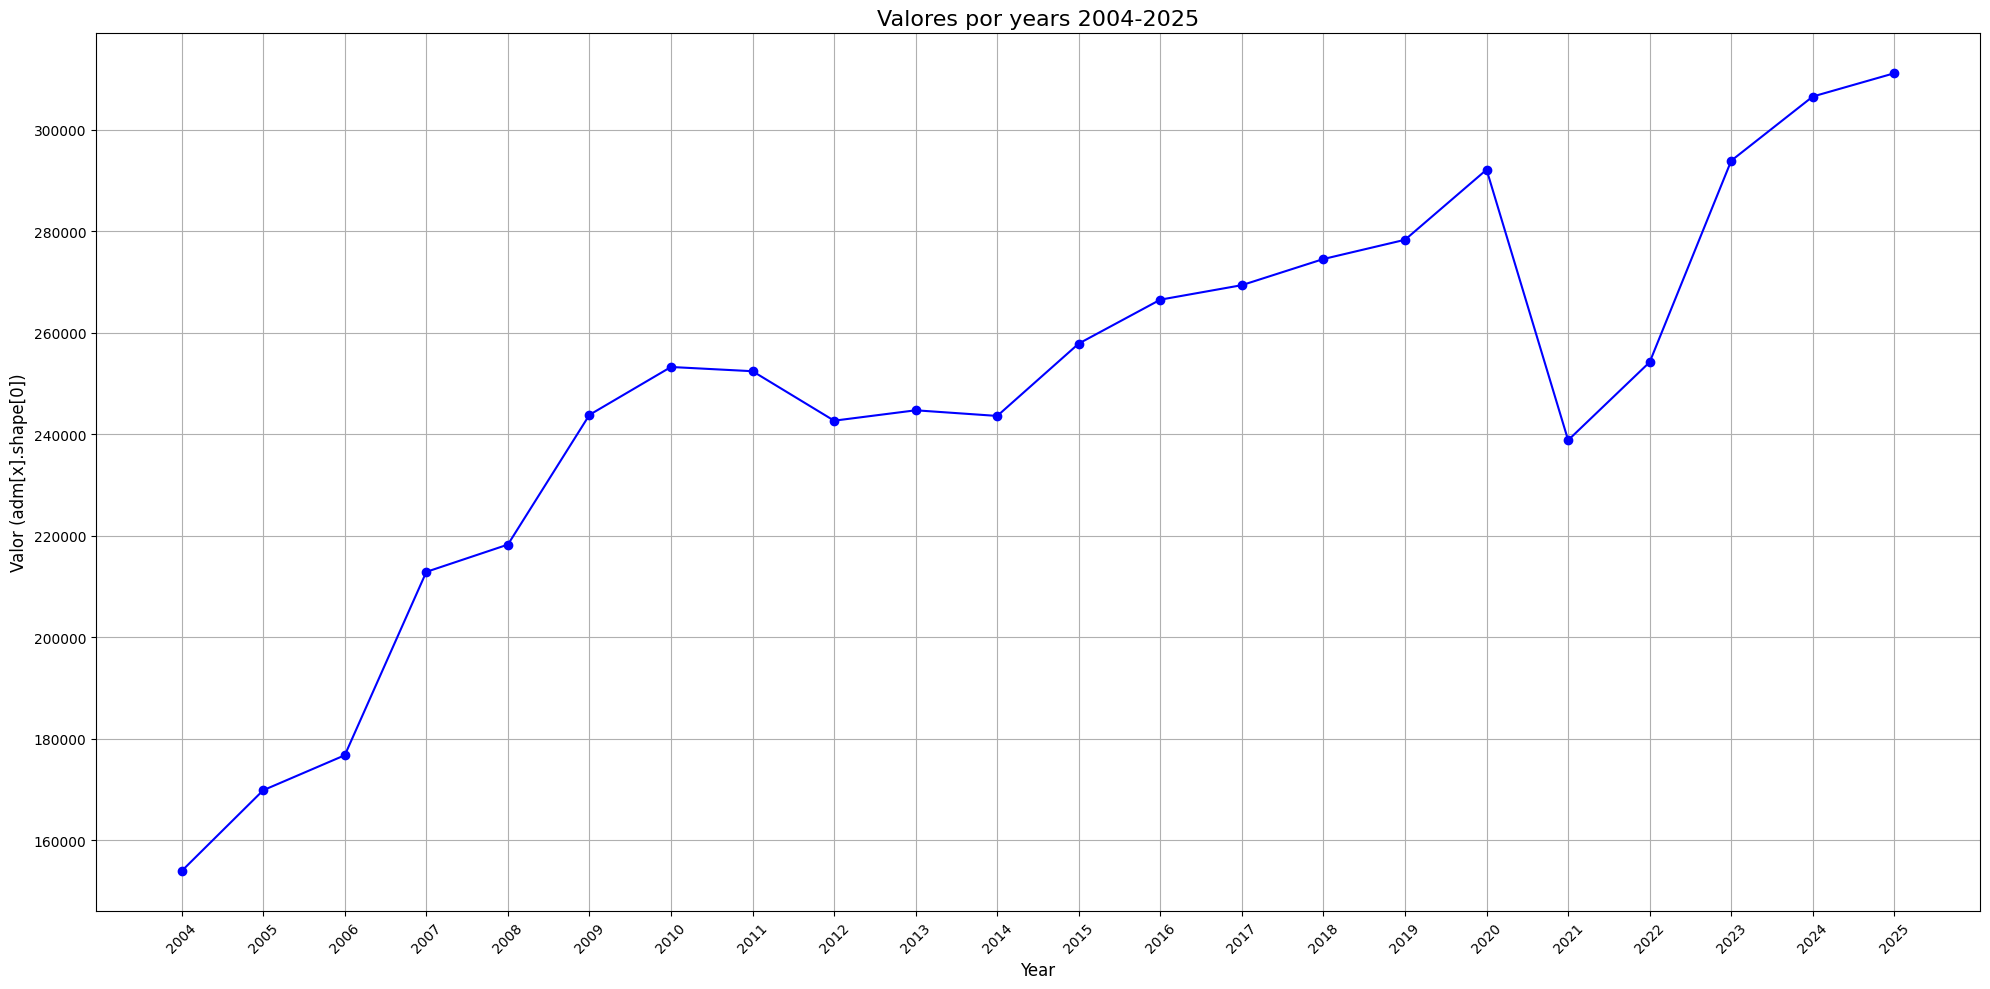

In [ ]:
tmp = [153982, 169888, 176778, 212889, 218261,
       243809, 253236, 252402, 242661, 244707,
       243596, 257852,266494, 269351, 274498,
       278287, 292091,238818, 254191, 293865,
       306497, 311084]

years = list(range(2004, 2026))


plt.figure(figsize=(20, 10))
plt.plot(years, tmp, marker='o', linestyle='-', color='b')
plt.title('Valores por years 2004-2025', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Valor (adm[x].shape[0])', fontsize=12)
plt.xticks(years, rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

##### Podemos ver el grafico como ha habiado un aumento en las inscripciones a la prueba de educacion superios.
##### A su vez, logramos identificar la cantidad de inscripciones por año.

### Pregunta 2.
###### ¿Hubo un aumento en las inscripciones en los periodos de transición (PSU/PTU/PAES)? 

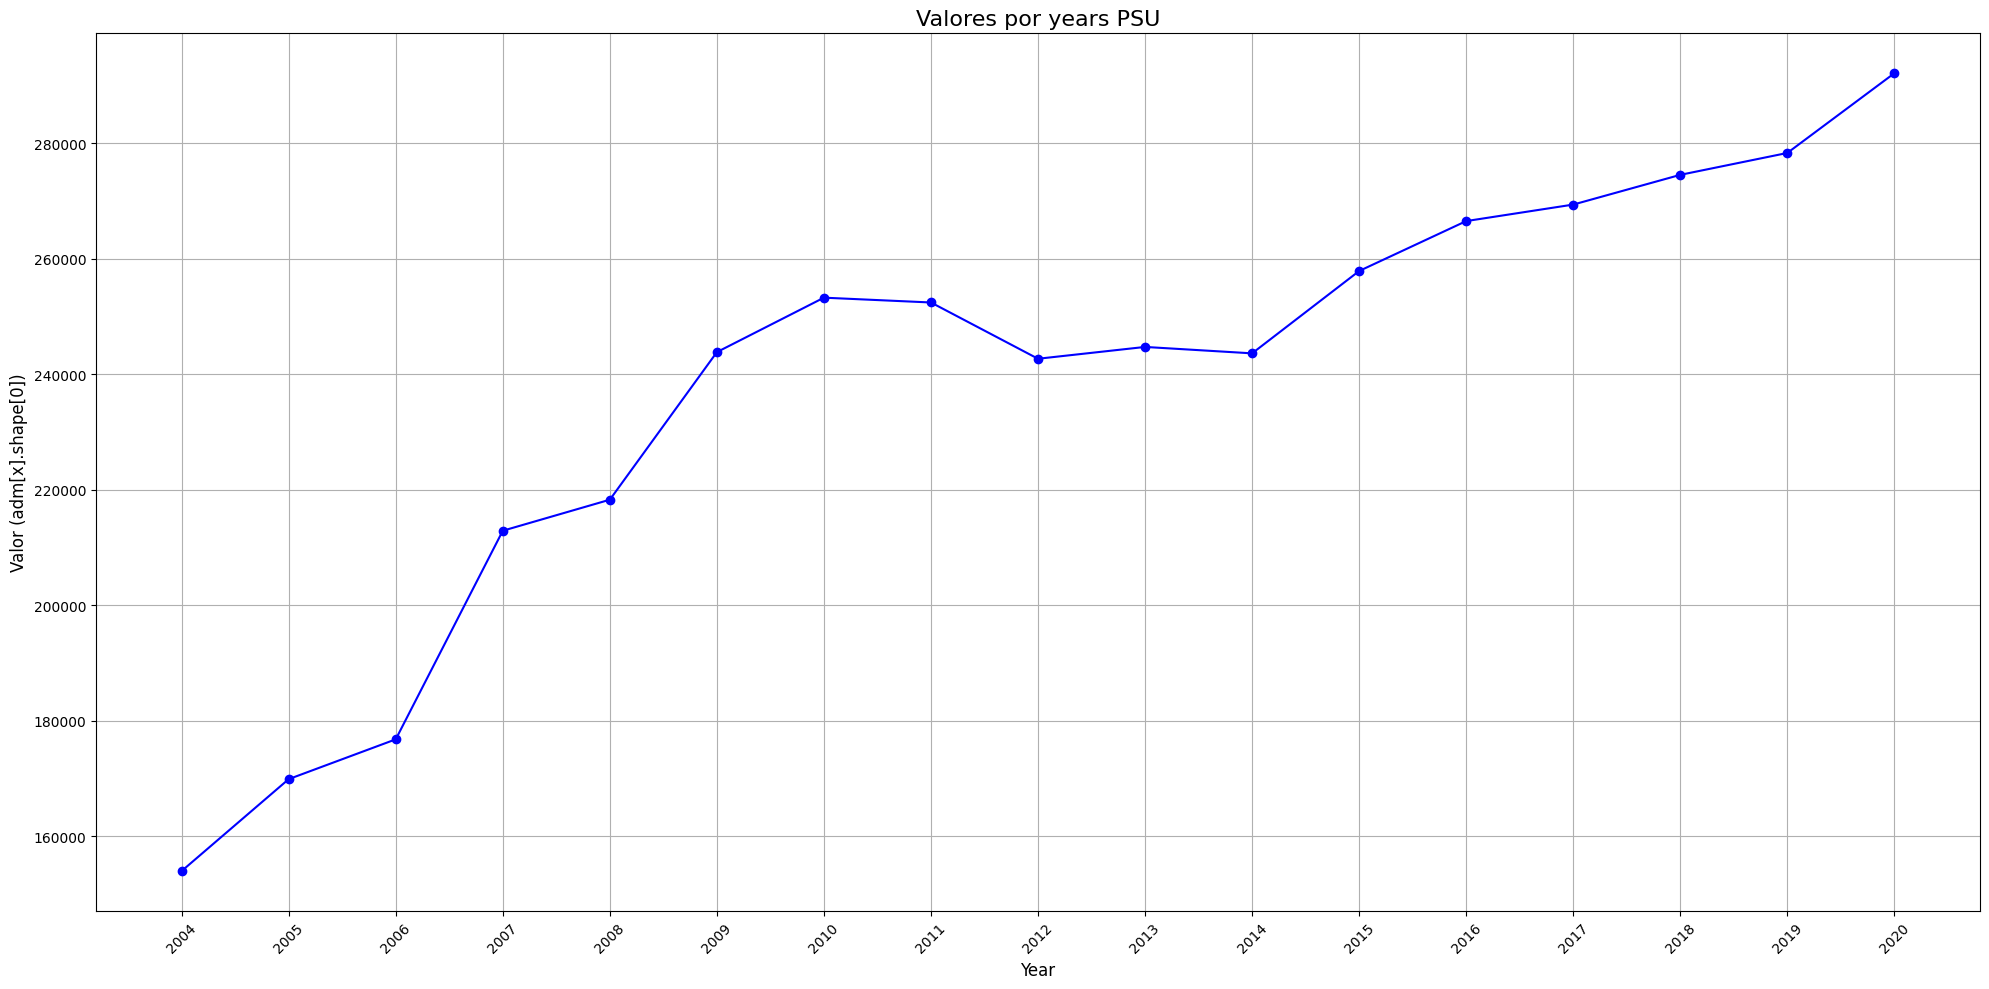

In [ ]:
# PSU del 2004 al 2020 como ultimo año
tmp = [153982, 169888, 176778, 212889, 218261,
       243809, 253236, 252402, 242661, 244707,
       243596, 257852,266494, 269351, 274498,
       278287, 292091]

years = list(range(2004, 2021))

plt.figure(figsize=(20, 10))
plt.plot(years, tmp, marker='o', linestyle='-', color='b')
plt.title('Valores por years PSU', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Valor (adm[x].shape[0])', fontsize=12)
plt.xticks(years, rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

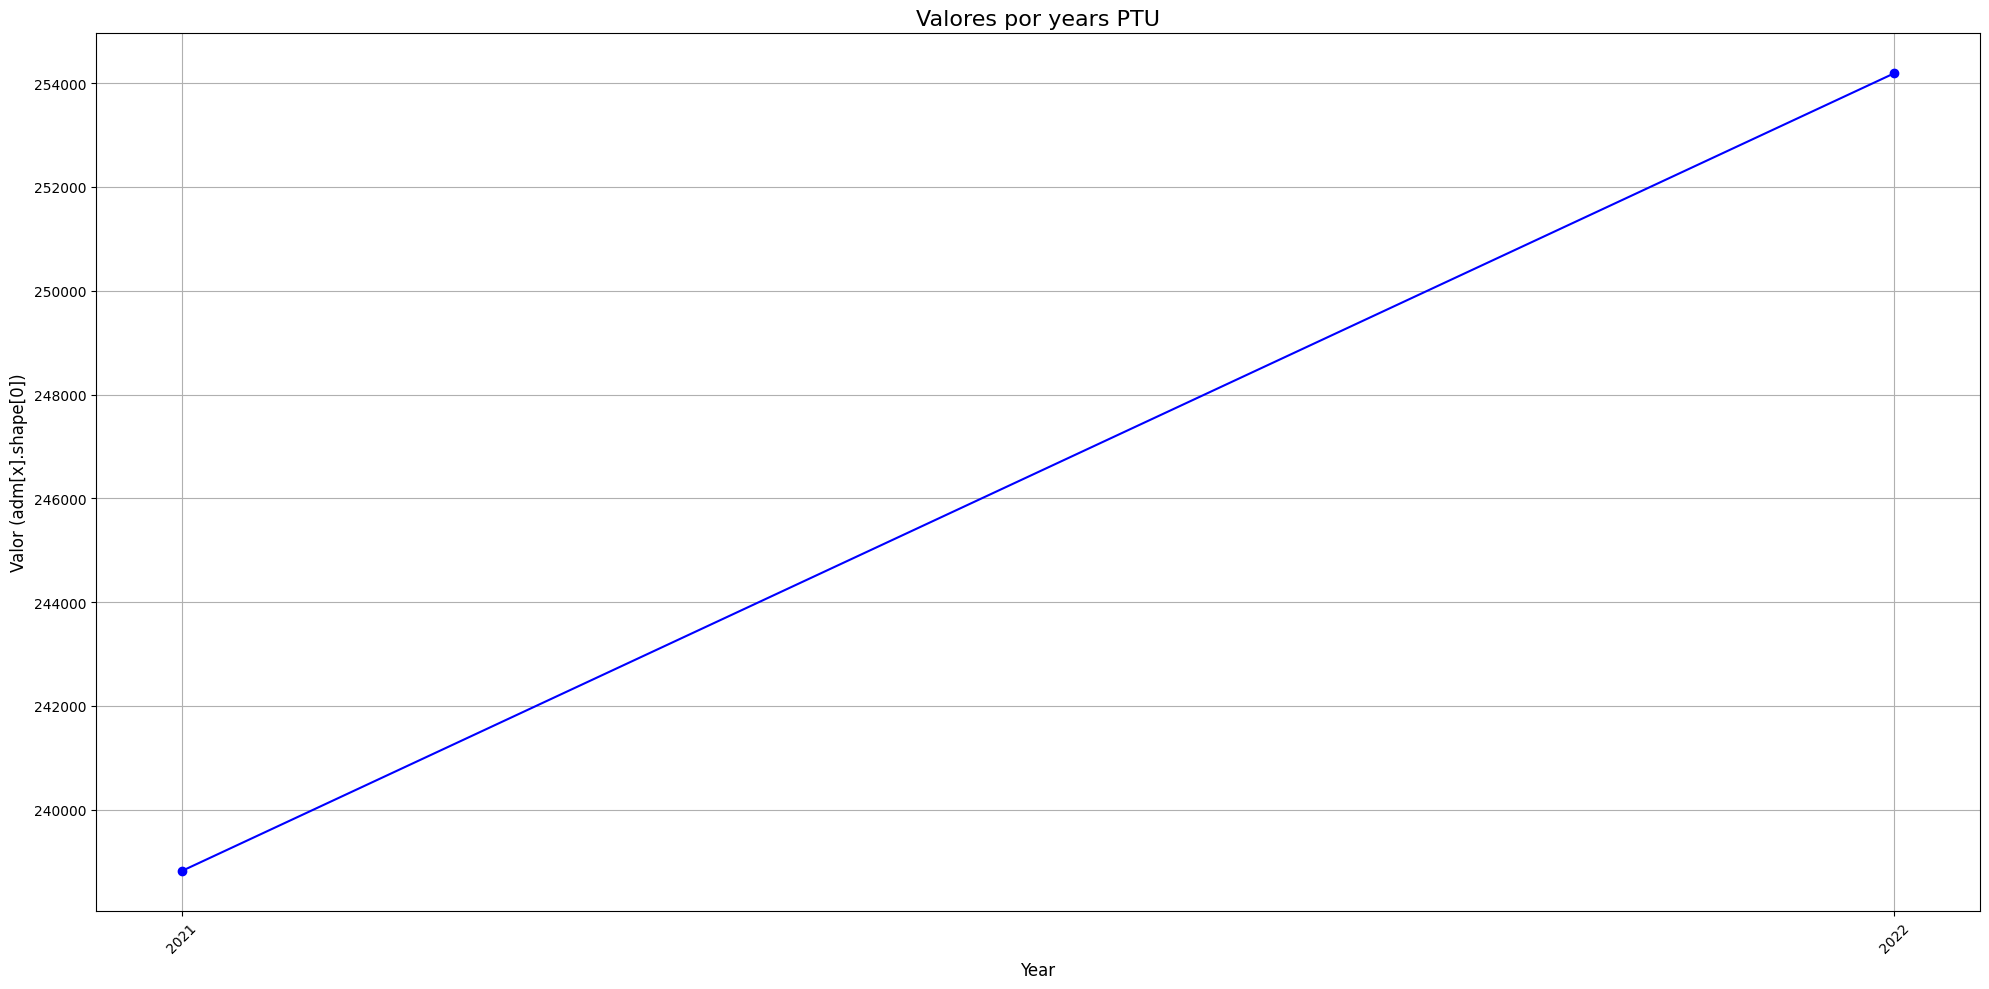

In [ ]:
#PTU se hizo en el año 2021 y 2022
tmp =[238818, 254191]
years = [2021, 2022]

plt.figure(figsize=(20, 10))
plt.plot(years, tmp, marker='o', linestyle='-', color='b')
plt.title('Valores por years PTU', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Valor (adm[x].shape[0])', fontsize=12)
plt.xticks(years, rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

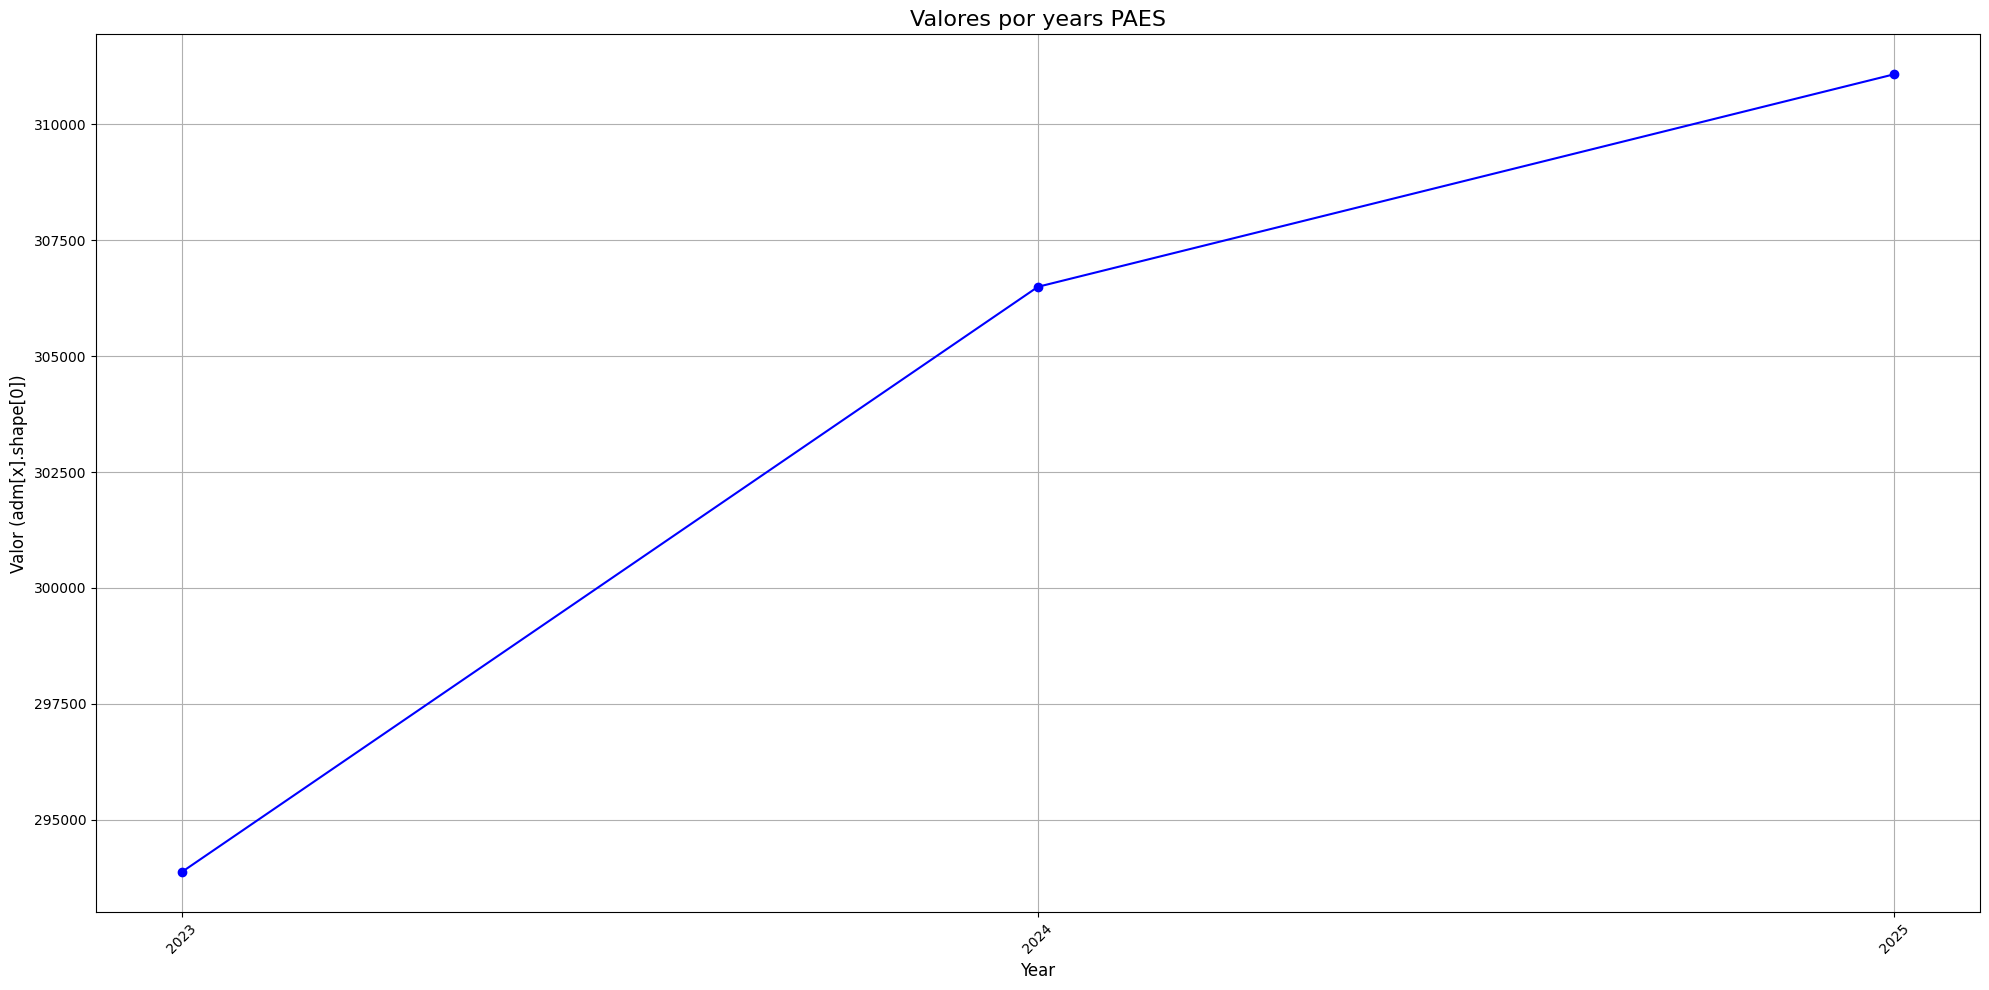

In [ ]:
#PAES 2023 y 2025
tmp= [293865,306497, 311084]
years = [2023, 2024, 2025]

plt.figure(figsize=(20,10))
plt.plot(years, tmp, marker='o', linestyle='-', color='b')
plt.title('Valores por years PAES', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Valor (adm[x].shape[0])', fontsize=12)
plt.xticks(years, rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

##### Ahi podemos ver los distintos graficos de la PSU, PTU y PAES   (falta escribir mas, analizar y juntar los 4 grafifcos en 1, en la clase pasada mostraron como ahcerl, lo hago luego)

## Pregunta 4.
#### ¿Qué comunas presentaron los mayores porcentajes de ingresos a la educación superior?


### Para responder a la pregunta veremos los datos y seleccionaremos las columnas utiles para responder la misma


In [ ]:
datos_adm = adm[14:len(adm)]

columna = ['ID_aux', 'CODIGO_REGION', 'CODIGO_COMUNA']
for df in range(len(datos_adm)):
    datos_adm[df] = datos_adm[df][columna]
    
datos_adm[1].head()



,ID_aux,CODIGO_REGION,CODIGO_COMUNA
0,id_0000900070019,14.0,14101.0
1,id_0000900270084,15.0,15101.0
2,id_0000900370016,5.0,5502.0
3,id_0000900370067,5.0,5502.0
4,id_0000900370092,5.0,5502.0


#### Ahora uniremos los datos para poder poseer todos los datos en un unico dataframe, ordenados en base al id

In [ ]:
datos_final = []
for i in range((len(datos_adm))):
    datos_final.append(pd.merge(datos_adm[i] , datos_egresado[i], on = 'ID_aux', how='inner'))

datos_final[1].head() 

,ID_aux,CODIGO_REGION,CODIGO_COMUNA,CODIGO_UNIV,CODIGO,VIA,PREFERENCIA,PTJE_POND,POND_ANYO_ACAD,TIPO_MATRICULA
0,id_0000900370016,5.0,5502.0,26,26010,1,1,"588,55",1,1
1,id_0000900470020,13.0,13104.0,38,38292,1,1,"586,5",1,1
2,id_0000900970026,11.0,11101.0,48,48005,1,1,"638,3",1,1
3,id_0001900370153,7.0,7405.0,35,35001,1,1,"583,35",1,1
4,id_0001900470113,13.0,13301.0,53,53306,1,1,"438,4",2,1


#### Ahora haremos una breve limpieza de datos eliminando columnas y calculando el porcentaje

In [ ]:
cantidad_comuna = []
for i in datos_final:
    cantidad_datos = len(i)
    i["CODIGO_COMUNA"] = i["CODIGO_COMUNA"].astype(int)
    seriee = i["CODIGO_COMUNA"].value_counts().head(10)
    dff = seriee.reset_index()
    dff.columns = ['CODIGO_COMUNA', 'Cantidad']
    dff["Porcentaje"] = round((dff["Cantidad"] / cantidad_datos) * 100 , 3)
    cantidad_comuna.append((dff))
cantidad_comuna[0].head(10) 

,CODIGO_COMUNA,Cantidad,Porcentaje
0,13101,5509,5.441
1,13119,3178,3.139
2,9101,3163,3.124
3,13114,2862,2.827
4,8101,2861,2.826
5,13201,2774,2.740
6,13123,2771,2.737
7,13110,2480,2.450
8,2101,2270,2.242
9,5109,2257,2.229



#### Se modifica el codigo comuna para tambien mostrar el nombre de la comuna, de forma que se pueda leer que comuna es



In [ ]:

comuna_c = dcopy(comuna)
comuna_c = comuna_c[14:len(comuna)]
renombre_comuna = dcopy(cantidad_comuna)
lista_final = []

df_10 = renombre_comuna[0]
df_look = comuna_c[0]
df_look = df_look[["COM", "COM_NOMBRE"]]
df_look.columns = ["CODIGO_COMUNA" , "NOMBRE_COMUNA" ]
df = pd.merge(df_10 , df_look , on= "CODIGO_COMUNA" , how="left" )
lista_final.append(df[["CODIGO_COMUNA" , "NOMBRE_COMUNA" , "Cantidad" , "Porcentaje"]])





for i in range(len(comuna_c) - 2):
    df_10 = renombre_comuna[i + 1]
    df_look = comuna_c[i + 1]
    df_look = df_look[["COD.COMUNA", "COM NOMBRE"]]
    df_look.columns = ["CODIGO_COMUNA" , "NOMBRE_COMUNA" , ]
    
    df = pd.merge(df_10 , df_look , on= "CODIGO_COMUNA" , how="left" )
    lista_final.append(df[["CODIGO_COMUNA" , "NOMBRE_COMUNA" , "Cantidad" , "Porcentaje" ]])
    
lista_final[1].head()

,CODIGO_COMUNA,NOMBRE_COMUNA,Cantidad,Porcentaje
0,13101,SANTIAGO,5282,5.090
1,13119,MAIPU,3364,3.242
2,9101,TEMUCO,3218,3.101
3,13114,LAS CONDES,2835,2.732
4,13201,PUENTE ALTO,2783,2.682


#### de esta forma se responde a la pregunta ¿Qué comunas presentaron los mayores porcentajes de ingresos a la educación superior? a lo largo de los años 2018 a 2024

In [ ]:
#en caso de desear ver el top 10 anual se cambia la variable datos_presentes
datos_presentes = 3
for i in range(len(lista_final)):
    print("Año :",2018 + i)
    display(lista_final[i].head(datos_presentes))

Año : 2018


,CODIGO_COMUNA,NOMBRE_COMUNA,Cantidad,Porcentaje
0,13101,SANTIAGO,5509,5.441
1,13119,MAIPU,3178,3.139
2,9101,TEMUCO,3163,3.124


Año : 2019


,CODIGO_COMUNA,NOMBRE_COMUNA,Cantidad,Porcentaje
0,13101,SANTIAGO,5282,5.090
1,13119,MAIPU,3364,3.242
2,9101,TEMUCO,3218,3.101


Año : 2020


,CODIGO_COMUNA,NOMBRE_COMUNA,Cantidad,Porcentaje
0,13101,SANTIAGO,4926,5.027
1,13119,MAIPU,3252,3.319
2,9101,TEMUCO,3165,3.230


Año : 2021


,CODIGO_COMUNA,NOMBRE_COMUNA,Cantidad,Porcentaje
0,13101,SANTIAGO,4452,4.824
1,9101,TEMUCO,2747,2.977
2,13119,MAIPU,2719,2.946


Año : 2022


,CODIGO_COMUNA,NOMBRE_COMUNA,Cantidad,Porcentaje
0,13101,SANTIAGO,4452,4.640
1,13119,MAIPU,3015,3.143
2,9101,TEMUCO,2777,2.895


Año : 2023


,CODIGO_COMUNA,NOMBRE_COMUNA,Cantidad,Porcentaje
0,13101,SANTIAGO,4799,4.312
1,13119,MAIPU,3426,3.078
2,13201,PUENTE ALTO,3392,3.048


Año : 2024


,CODIGO_COMUNA,NOMBRE_COMUNA,Cantidad,Porcentaje
0,13101,SANTIAGO,4814,4.067
1,13119,MAIPU,3646,3.080
2,13201,PUENTE ALTO,3479,2.939


## Pregunta 5.
#### ¿Qué relación existe entre la situación de egreso de los estudiantes y los resultados de admisión a la educación superior?


##### Relación egreso y resultados admisión

In [ ]:
df_p5 = (
    total_por_egr.merge(mat_por_egr, on='SIT_EGRESO_STR', how='left').fillna({'n_matriculados': 0})
    .merge(pond_prom, on='SIT_EGRESO_STR', how='left')
    .assign(**{'tasa_matricula_%': lambda d: (d['n_matriculados'] / d['n_total']) * 100})
    .sort_values('tasa_matricula_%', ascending=False)
)

display(df_p5)

,SIT_EGRESO_STR,n_total,n_matriculados,promedio_ptje_ponderado,tasa_matricula_%
6,7,695,179,641.953073,25.755396
4,5,1659394,326029,603.219285,19.647474
2,3,459,83,666.982289,18.082789
0,1,3750497,526498,621.139060,14.038086
5,6,20153,1950,577.620415,9.675979
7,8,4577,411,610.987105,8.979681
1,2,17723,1562,578.841364,8.813406
3,4,1738,39,623.351282,2.243959


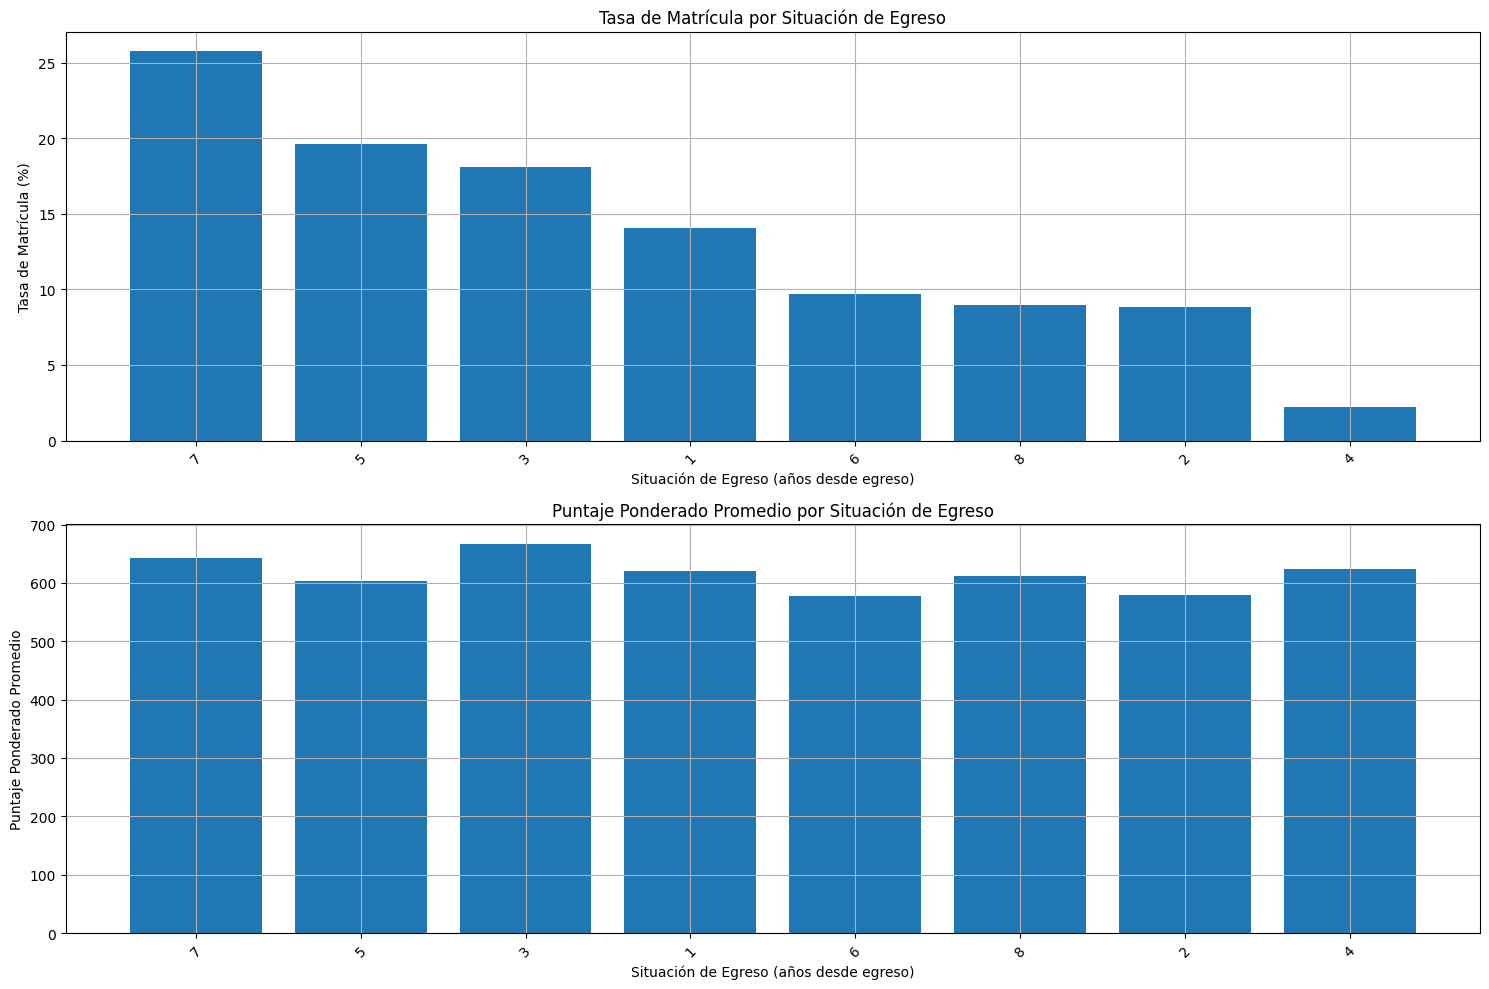

In [ ]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['axes.grid'] = True
plt.figure()

# Gráfico para tasa de matrícula por situación de egreso
plt.subplot(2, 1, 1)
plt.bar(df_p5['SIT_EGRESO_STR'], df_p5['tasa_matricula_%'])
plt.title('Tasa de Matrícula por Situación de Egreso')
plt.xlabel('Situación de Egreso (años desde egreso)')
plt.ylabel('Tasa de Matrícula (%)')
plt.xticks(rotation=45)

# Gráfico de puntajes promedio por situación de egreso
plt.subplot(2, 1, 2)
plt.bar(df_p5['SIT_EGRESO_STR'], df_p5['promedio_ptje_ponderado'])
plt.title('Puntaje Ponderado Promedio por Situación de Egreso')
plt.xlabel('Situación de Egreso (años desde egreso)')
plt.ylabel('Puntaje Ponderado Promedio')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### HALLAZGOS PRINCIPALES:
##### - Mayor tasa de matrícula: 25.8% (Situación: 7)
##### - Menor tasa de matrícula: 2.2% (Situación: 4)
##### - Puntaje promedio más alto: 667.0 (Situación: 3)

#### CORRELACIONES:
##### - Correlación años desde egreso vs tasa de matrícula: 0.161
##### - Correlación años desde egreso vs puntaje promedio: -0.042

##### CONCLUSIÓN:
##### La relación entre situación de egreso y resultados de admisión muestra que los recién egresados (0 años) tienen mejores resultados tanto en tasas de matrícula como en puntajes, a su vez existe una tendencia descendente en ambos indicadores a medida que aumentan los años desde el egreso. La brecha más significativa se observa entre recién egresados y quienes llevan más tiempo fuera del sistema escolar, los datos sugieren que el tiempo transcurrido desde el egreso tiene un impacto negativo en las oportunidades de acceso a la educación superior

### Nuevas pregunta surgida en el proceso EDA:
###### .............


## Conclusiones 


### Pregunta 3 — Implementación multi‑año (% ingresos por GSE y universidad)
En esta sección calculamos, para cada año, la distribución interna de matriculados por grupo socioeconómico (GSE) dentro de cada universidad. El GSE se construye por quintiles anuales (Q1–Q5) a partir de `INGRESO_BRUTO_FAM` del ArchivoB (Inscripción).

In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np

PATH = Path('raw_data')
YEARS = range(2004, 2026)

# Utilidad: normalizar ID y convertir números con coma/centavos a floats
_def_na = {'': np.nan, 'NA': np.nan, 'NaN': np.nan, 'nan': np.nan, 'None': np.nan}

def _norm_id(s: pd.Series) -> pd.Series:
    return s.astype('string').str.strip().str.lower()

def _to_num(x: pd.Series) -> pd.Series:
    s = x.astype('string').replace(_def_na).str.strip()
    s = s.str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
    return pd.to_numeric(s, errors='coerce')

# Localizador de archivos por año
def _find_file(year: int, kind: str) -> list[Path]:
    # kind in {'B','M','XLS','OFERTA'}
    base = PATH / str(year)
    if kind == 'B':
        # Inscripción (ArchivoB)
        pats = [f"**/ArchivoB_Adm{year}*.csv"]
    elif kind == 'M':
        # Matrícula (ArchivoMatr)
        pats = [f"**/ArchivoMatr_Adm{year}*.csv"]
    elif kind == 'XLS':
        pats = [
            f"**/Libro_CódigosADM{year}_ArchivoC.xlsx",
            f"**/Libro_CódigosADM{year} _ArchivoC.xlsx",
            f"**/Libro_CodigosADM{year}_ArchivoC.xlsx"
        ]
    elif kind == 'OFERTA':
        # Oferta Académica (POSTULACIÓN) con variantes de nombres y acentos
        pats = [
            f"**/POSTULACIÓN/Oferta*Acad*Admi*{year}*.xlsx",
            f"**/POSTULACION/Oferta*Acad*Admi*{year}*.xlsx",
            f"**/Oferta*Acad*Admi*{year}*.xlsx",
            f"**/Oferta*Acad*{year}*.xlsx"
        ]
    else:
        return []
    files = []
    for p in pats:
        files.extend(base.glob(p))
    return files

# Cargar Inscripción (ArchivoB) ~ socioeconómico
def cargar_inscripcion(year: int) -> pd.DataFrame:
    out = []
    for f in _find_file(year, 'B'):
        try:
            df = pd.read_csv(f, sep=';', low_memory=False, dtype={'ID_aux': 'string'})
            # columnas mínimas
            cols = [c for c in df.columns if c in {'ID_aux','INGRESO_BRUTO_FAM'}]
            if 'ID_aux' not in cols:
                continue
            df = df[cols].copy()
            df['ID'] = _norm_id(df['ID_aux'])
            if 'INGRESO_BRUTO_FAM' in df.columns:
                df['INGRESO_NUM'] = _to_num(df['INGRESO_BRUTO_FAM'])
            else:
                df['INGRESO_NUM'] = np.nan
            df['ANIO'] = year
            out.append(df[['ID','ANIO','INGRESO_NUM']])
        except Exception:
            continue
    return pd.concat(out, ignore_index=True) if out else pd.DataFrame(columns=['ID','ANIO','INGRESO_NUM'])

# Construir GSE por quintiles anuales (Q1..Q5) a partir de INGRESO_NUM
def construir_gse_anual(df_b: pd.DataFrame) -> pd.DataFrame:
    if df_b.empty:
        return df_b.assign(GSE_STD=pd.Series(dtype='string'))
    parts = []
    for y, g in df_b.groupby('ANIO', sort=True):
        x = g['INGRESO_NUM']
        ok = x.notna().sum()
        gse_series = pd.Series(index=g.index, data=pd.NA, dtype='string')
        if ok >= 50:
            try:
                gse_series.loc[x.notna()] = pd.qcut(x.dropna(), q=5, labels=['Q1','Q2','Q3','Q4','Q5'], duplicates='drop')
            except ValueError:
                uniq = x.dropna().nunique()
                bins = min(uniq, 5)
                if bins >= 2:
                    labels = ['Q1','Q2','Q3','Q4','Q5'][:bins]
                    gse_series.loc[x.notna()] = pd.qcut(x.dropna(), q=bins, labels=labels, duplicates='drop')
        tmp = g[['ID']].copy()
        tmp['ANIO'] = y
        tmp['GSE_STD'] = gse_series.fillna('Desconocido')
        parts.append(tmp[['ID','ANIO','GSE_STD']])
    return pd.concat(parts, ignore_index=True) if parts else df_b.assign(GSE_STD=pd.Series(dtype='string'))

# Cargar Matrícula (ArchivoMatr) ~ ingresados
def cargar_matricula(year: int) -> pd.DataFrame:
    out = []
    for f in _find_file(year, 'M'):
        try:
            df = pd.read_csv(f, sep=';', low_memory=False, dtype={'ID_aux': 'string'})
            cols = [c for c in df.columns if c in {'ID_aux','CODIGO_UNIV','PTJE_POND','TIPO_MATRICULA','VIA'}]
            if 'ID_aux' not in cols or 'CODIGO_UNIV' not in cols:
                continue
            df = df[cols].copy()
            df['ID'] = _norm_id(df['ID_aux'])
            df['ANIO'] = year
            if 'PTJE_POND' in df.columns:
                df['PTJE_POND'] = _to_num(df['PTJE_POND'])
            # Mantener un registro por (ID, ANIO): si hay múltiples, quedarse con el primero
            df = df.drop_duplicates(subset=['ID','ANIO'], keep='first')
            out.append(df[['ID','ANIO','CODIGO_UNIV','PTJE_POND']])
        except Exception:
            continue
    return pd.concat(out, ignore_index=True) if out else pd.DataFrame(columns=['ID','ANIO','CODIGO_UNIV','PTJE_POND'])

# Cargar Oferta Académica para mapear código -> nombre (prioritario)
def cargar_oferta_univ(year: int) -> dict:
    nombres: dict[int, str] = {}
    files = _find_file(year, 'OFERTA')
    for f in files:
        try:
            xls = pd.ExcelFile(f)
        except Exception:
            continue
        for sheet in xls.sheet_names:
            try:
                dfx = xls.parse(sheet, dtype='string')
            except Exception:
                continue
            if dfx is None or dfx.empty:
                continue
            cols_map = {str(c).strip().upper(): c for c in dfx.columns}
            # posibles variantes
            code_keys = [
                'UNI_CODIGO','CODIGO_UNIV','COD_UNIV','CODIGO_UNIVERSIDAD','CODIGO UNIVERSIDAD',
                'COD_UNIVERSIDAD','UNIVERSIDAD_CODIGO','CÓDIGO_UNIVERSIDAD','ID_UNIVERSIDAD',
                'ID_INSTITUCION','INSTITUCION_CODIGO','CODIGO'
            ]
            name_keys = [
                'NOMBRE_UNIVERSIDAD','UNIVERSIDAD','NOM_UNIVERSIDAD','NOMBRE INSTITUCIÓN',
                'NOMBRE_INSTITUCION','INSTITUCIÓN','INSTITUCION','NOMBRE IES','RAZON_SOCIAL',
                'NOMBRE_UNIV','NOMBRE'
            ]
            cand_code = next((cols_map[k] for k in code_keys if k in cols_map), None)
            cand_name = next((cols_map[k] for k in name_keys if k in cols_map), None)
            if not cand_code or not cand_name:
                continue
            sub = dfx[[cand_code, cand_name]].dropna()
            for _, r in sub.iterrows():
                try:
                    c_str = str(r[cand_code]).strip()
                    # limpiar posibles decimales/formatos
                    if c_str.endswith('.0'):
                        c_str = c_str[:-2]
                    c = int(c_str)
                    if c not in nombres:
                        nombres[c] = str(r[cand_name]).strip()
                except Exception:
                    continue
        # si encontramos algo en este archivo, podemos seguir al siguiente año
        if nombres:
            break
    return nombres

# Intentar mapear CODIGO_UNIV a nombre usando Oferta Académica y luego Libro de Códigos
def cargar_mapa_univ(year: int) -> dict:
    nombres: dict[int, str] = {}
    # 1) Prioridad: Oferta Académica
    try:
        oferta_map = cargar_oferta_univ(year)
        if oferta_map:
            nombres.update(oferta_map)
    except Exception:
        pass
    # 2) Fallback: Libro de Códigos
    for f in _find_file(year, 'XLS'):
        try:
            xls = pd.ExcelFile(f)
            for sheet in xls.sheet_names:
                try:
                    dfx = xls.parse(sheet)
                except Exception:
                    continue
                cols = {str(c).strip().upper(): c for c in dfx.columns}
                cand_code = None
                # en muchos libros, los códigos están en VALOR/CODIGO_*
                for key in ['CODIGO_UNIV','COD_UNIV','CODUNIV','CODIGO INSTITUCION','CODIGO_INSTITUCION','VALOR','CODIGO','CÓDIGO']:
                    if key in cols:
                        cand_code = cols[key]
                        break
                cand_name = None
                for key in ['NOMBRE_UNIV','NOMBRE UNIVERSIDAD','UNIVERSIDAD','NOMBRE_INSTITUCION','NOMBRE INSTITUCION','ETIQUETA','GLOSA','DESCRIPCION','NOMBRE']:
                    if key in cols:
                        cand_name = cols[key]
                        break
                if cand_code and cand_name:
                    sub = dfx[[cand_code, cand_name]].dropna()
                    for _, r in sub.iterrows():
                        try:
                            c_str = str(r[cand_code]).strip()
                            if c_str.endswith('.0'):
                                c_str = c_str[:-2]
                            c = int(c_str)
                            if c not in nombres:
                                nombres[c] = str(r[cand_name]).strip()
                        except Exception:
                            continue
        except Exception:
            continue
    return nombres

# Pipeline principal: construir tablas larga y ancha por año y un agregado

def construir_p3_resultados(years=YEARS, top_n_univ=None):
    tablas_anuales = {}
    tablas_anchas = {}
    cobertura = []
    for y in years:
        b = cargar_inscripcion(y)
        m = cargar_matricula(y)
        if b.empty or m.empty:
            continue
        b_gse = construir_gse_anual(b)
        cov = 100 * (b_gse['GSE_STD'] != 'Desconocido').mean()
        cobertura.append({'ANIO': y, 'cobertura_gse_%': round(cov,1)})
        t = m.merge(b_gse, on=['ID','ANIO'], how='left')
        mapa = cargar_mapa_univ(y)
        if mapa:
            t['UNIV'] = t['CODIGO_UNIV'].astype('Int64').map(mapa).astype('string')
            t['UNIV'] = t['UNIV'].fillna('UNIV_' + t['CODIGO_UNIV'].astype('Int64').astype('string'))
        else:
            t['UNIV'] = 'UNIV_' + t['CODIGO_UNIV'].astype('Int64').astype('string')
        base = t.copy()
        base['GSE_STD'] = base['GSE_STD'].fillna('Desconocido')
        grp = (base[base['GSE_STD']!='Desconocido']
               .groupby(['ANIO','UNIV','GSE_STD'], as_index=False)
               .size())
        grp = grp.rename(columns={'size':'n_matriculados'})
        tot = grp.groupby(['ANIO','UNIV'], as_index=False)['n_matriculados'].sum().rename(columns={'n_matriculados':'n_univ'})
        long = grp.merge(tot, on=['ANIO','UNIV'], how='left')
        long['pct_interno'] = (long['n_matriculados'] / long['n_univ'] * 100).round(1)
        if top_n_univ is not None and top_n_univ > 0:
            topu = (long.groupby('UNIV')['n_univ'].max().sort_values(ascending=False).head(top_n_univ).index)
            long = long[long['UNIV'].isin(topu)]
        wide = (long[long['ANIO']==y]
                .pivot_table(index='UNIV', columns='GSE_STD', values='pct_interno')
                .reindex(columns=['Q1','Q2','Q3','Q4','Q5']))
        wide = wide.sort_index()
        tablas_anuales[y] = long[long['ANIO']==y].reset_index(drop=True)
        tablas_anchas[y] = wide.reset_index()
    if tablas_anuales:
        long_all = pd.concat(tablas_anuales.values(), ignore_index=True)
        w = long_all.copy()
        w = w.assign(w=lambda d: d['n_univ'])
        agg = (w.groupby(['UNIV','GSE_STD'])
                 .apply(lambda g: np.average(g['pct_interno'], weights=g['w']))
                 .reset_index(name='pct_interno_prom_2004_2025'))
        wide_all = agg.pivot_table(index='UNIV', columns='GSE_STD', values='pct_interno_prom_2004_2025')
        wide_all = wide_all.reindex(columns=['Q1','Q2','Q3','Q4','Q5']).sort_index().reset_index()
    else:
        long_all = pd.DataFrame(columns=['ANIO','UNIV','GSE_STD','n_matriculados','n_univ','pct_interno'])
        wide_all = pd.DataFrame(columns=['UNIV','Q1','Q2','Q3','Q4','Q5'])
    cobertura_df = pd.DataFrame(cobertura)
    return tablas_anuales, tablas_anchas, wide_all, cobertura_df

In [ ]:
# P3_GSE_UNIV_ALL — Imprimir tablas por todos los años
YEARS_ALL = list(range(2004, 2026))
print(f"Construyendo tablas P3 para años: {YEARS_ALL} ...")
try:
    tablas_long, tablas_wide, wide_all, cobertura = construir_p3_resultados(years=YEARS_ALL)
    if cobertura is not None and not cobertura.empty:
        print("Cobertura GSE (no 'Desconocido') por año:")
        display(cobertura.sort_values('ANIO').reset_index(drop=True))
    years_present = sorted(tablas_wide.keys())
    for yy in years_present:
        print(f"\nTabla ancha % interno por GSE — {yy}")
        with pd.option_context('display.max_rows', None, 'display.max_columns', None):
            display(tablas_wide[yy])
    if wide_all is not None and not wide_all.empty:
        print("\nPromedio ponderado 2004–2025:")
        with pd.option_context('display.max_rows', None, 'display.max_columns', None):
            display(wide_all)
except Exception as e:
    print("Error al construir/imprimir tablas de todos los años:", e)

Construyendo tablas P3 para años: [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025] ...
Cobertura GSE (no 'Desconocido') por año:


C:\Users\sonee\AppData\Local\Temp\ipykernel_13852\981842774.py:257: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: np.average(g['pct_interno'], weights=g['w']))


,ANIO,cobertura_gse_%
0,2018,100.0
1,2019,100.0
2,2020,100.0
3,2021,0.0
4,2022,0.0
5,2023,0.0
6,2024,0.0
7,2025,0.0



Tabla ancha % interno por GSE — 2018


GSE_STD,UNIV,Q1,Q2,Q3,Q4,Q5
0,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,15.2,5.7,5.3,9.3,64.4
1,PONTIFICIA UNIVERSIDAD CATOLICA DE VALPARAISO,29.0,12.9,11.0,16.8,30.3
2,UNIVERSIDAD ADOLFO IBAÑEZ,7.5,1.4,2.2,6.4,82.4
3,UNIVERSIDAD ALBERTO HURTADO,32.2,15.5,11.6,17.7,23.0
4,UNIVERSIDAD ANDRES BELLO,23.2,12.2,10.9,19.2,34.6
5,UNIVERSIDAD ARTURO PRAT,35.4,17.9,13.6,17.7,15.3
6,UNIVERSIDAD AUSTRAL DE CHILE,36.2,15.3,11.1,15.5,22.0
7,UNIVERSIDAD AUTONOMA DE CHILE,41.7,20.3,13.2,15.5,9.3
8,UNIVERSIDAD CATOLICA DE LA SANTISIMA CONCEPCION,42.4,17.0,10.3,16.2,14.1
9,UNIVERSIDAD CATOLICA DE TEMUCO,47.1,17.3,10.8,13.6,11.2



Tabla ancha % interno por GSE — 2019


GSE_STD,UNIV,Q1,Q2,Q3,Q4,Q5
0,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,10.4,7.0,5.2,14.0,63.5
1,PONTIFICIA UNIVERSIDAD CATOLICA DE VALPARAISO,23.3,15.6,11.1,24.5,25.4
2,UNIVERSIDAD ACADEMIA DE HUMANISMO CRISTIANO,35.3,22.1,13.8,22.0,6.8
3,UNIVERSIDAD ADOLFO IBAÑEZ,3.4,2.5,2.7,11.9,79.5
4,UNIVERSIDAD ALBERTO HURTADO,27.7,18.9,14.3,24.1,14.9
5,UNIVERSIDAD ANDRES BELLO,19.5,13.2,11.4,28.0,28.0
6,UNIVERSIDAD ARTURO PRAT,33.2,19.2,13.0,22.6,12.0
7,UNIVERSIDAD AUSTRAL DE CHILE,30.0,17.6,11.5,23.6,17.4
8,UNIVERSIDAD AUTONOMA DE CHILE,37.4,23.3,14.5,19.2,5.7
9,UNIVERSIDAD BERNARDO O'HIGGINS,26.5,22.0,15.1,25.9,10.4



Tabla ancha % interno por GSE — 2020


GSE_STD,UNIV,Q1,Q2,Q3,Q4,Q5
0,UNIV_11,15.7,12.2,10.3,22.9,38.9
1,UNIV_12,9.2,6.5,5.3,14.9,64.1
2,UNIV_13,25.5,19.5,12.8,22.6,19.4
3,UNIV_14,19.4,17.7,13.7,25.0,24.2
4,UNIV_15,18.0,15.2,11.5,24.5,30.8
5,UNIV_16,21.5,17.7,14.5,27.4,18.9
6,UNIV_17,26.2,19.7,14.5,23.6,16.0
7,UNIV_18,16.9,13.8,11.3,28.7,29.2
8,UNIV_19,23.9,18.3,14.5,25.9,17.3
9,UNIV_20,20.5,18.6,17.7,28.4,14.8



Tabla ancha % interno por GSE — 2021


GSE_STD,UNIV,Q1,Q2,Q3,Q4,Q5



Tabla ancha % interno por GSE — 2022


GSE_STD,UNIV,Q1,Q2,Q3,Q4,Q5



Tabla ancha % interno por GSE — 2023


GSE_STD,UNIV,Q1,Q2,Q3,Q4,Q5



Tabla ancha % interno por GSE — 2024


GSE_STD,UNIV,Q1,Q2,Q3,Q4,Q5



Tabla ancha % interno por GSE — 2025


GSE_STD,UNIV,Q1,Q2,Q3,Q4,Q5



Promedio ponderado 2004–2025:


GSE_STD,UNIV,Q1,Q2,Q3,Q4,Q5
0,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,12.794267,6.351553,5.249881,11.655614,63.948925
1,PONTIFICIA UNIVERSIDAD CATOLICA DE VALPARAISO,26.126683,14.261045,11.050409,20.681498,27.829956
2,UNIVERSIDAD ACADEMIA DE HUMANISMO CRISTIANO,35.300000,22.100000,13.800000,22.000000,6.800000
3,UNIVERSIDAD ADOLFO IBAÑEZ,5.429112,1.955604,2.452547,9.178020,80.935226
4,UNIVERSIDAD ALBERTO HURTADO,29.957102,17.194634,12.945739,20.889899,18.962784
5,UNIVERSIDAD ANDRES BELLO,21.258013,12.724861,11.162431,23.818779,31.135916
6,UNIVERSIDAD ARTURO PRAT,34.340615,18.526000,13.311077,20.059538,13.710923
7,UNIVERSIDAD AUSTRAL DE CHILE,33.006350,16.484741,11.306042,19.672349,19.630518
8,UNIVERSIDAD AUTONOMA DE CHILE,39.533244,21.811690,13.855066,17.364418,7.485972
9,UNIVERSIDAD BERNARDO O'HIGGINS,26.500000,22.000000,15.100000,25.900000,10.400000
